<a href="https://colab.research.google.com/github/AnaGT/Anamilena/blob/main/plantcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from plantcv import plantcv as pcv

In [3]:
!pip install plantcv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 286 kB 8.4 MB/s 
     |████████████████████████████████| 41 kB 613 kB/s 


In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
class options:
  def __init__(self):
    self.image = "/BS_45006.jpg"
    self.debug = "plot"

In [8]:
args = options()

pcv.params.debug = args.debug
pcv.params.text_size = 5
pcv.params.line_thickness = 5

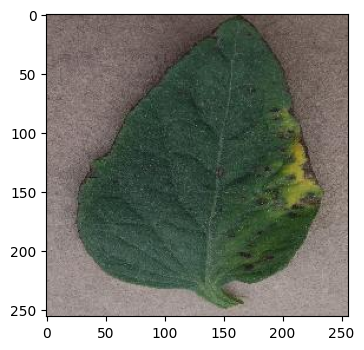

In [9]:
#read image
img, path, filename = pcv.readimage(filename = args.image)

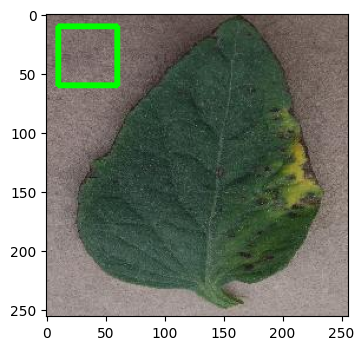

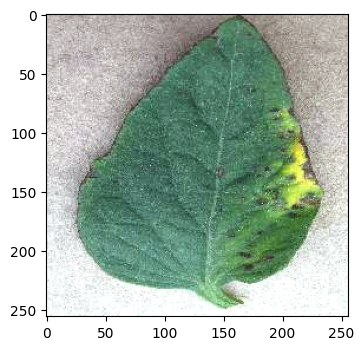

In [10]:
correct_image = pcv.white_balance(img, mode = "hist", roi= [10,10,50,50])

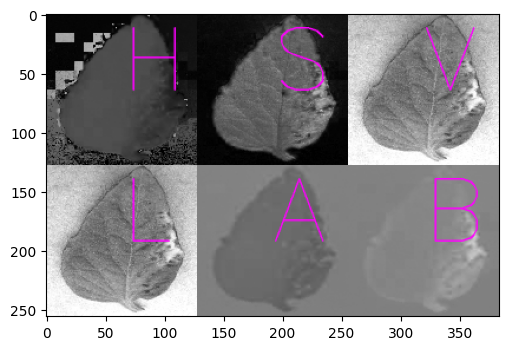

In [12]:
cs_plot = pcv.visualize.colorspaces(rgb_img=correct_image, original_img=False)

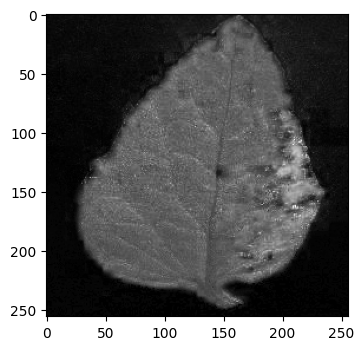

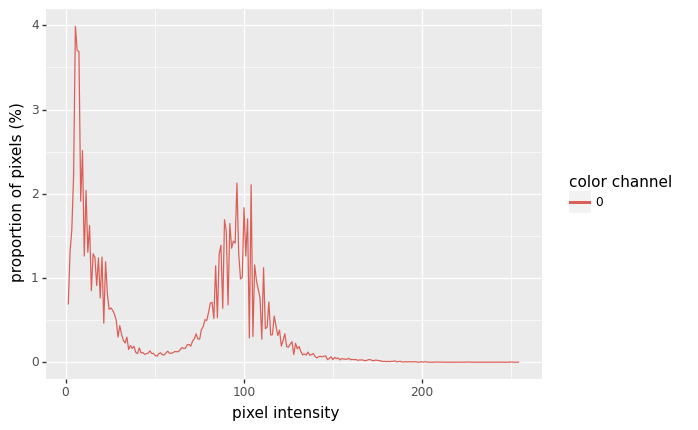

In [16]:
s = pcv.rgb2gray_hsv(rgb_img=correct_image, channel='s')
hist_figure = pcv.visualize.histogram(img = s, bins = 255, lower_bound= 1,upper_bound= 255)

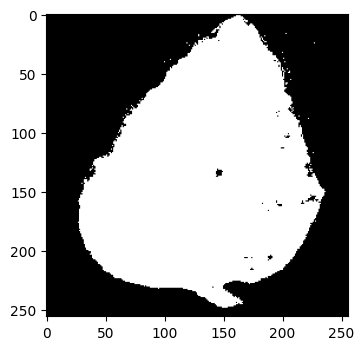

In [19]:
l_thresh = pcv.threshold.binary(gray_img=s, threshold=50, max_value=255, object_type= "light")

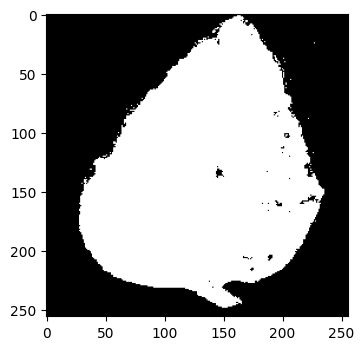

In [21]:
otsu_img = pcv.threshold.otsu(gray_img=s, max_value=255, object_type="light")

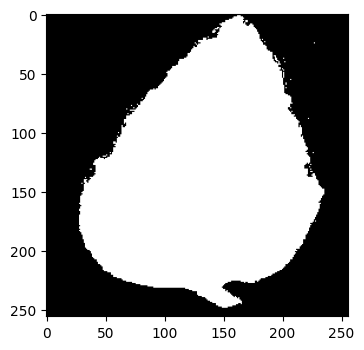

In [22]:
img_fill = pcv.fill_holes(otsu_img)

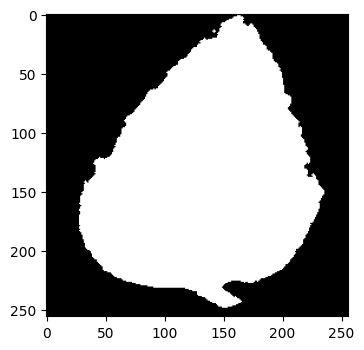

In [23]:
open_img= pcv.opening(img_fill)

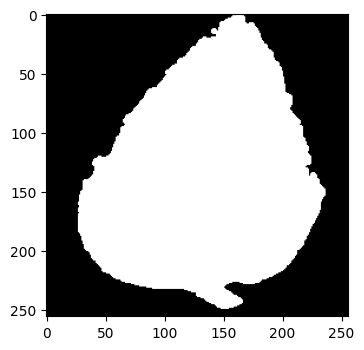

In [25]:
dilated= pcv.dilate(open_img, ksize=3, i=1)

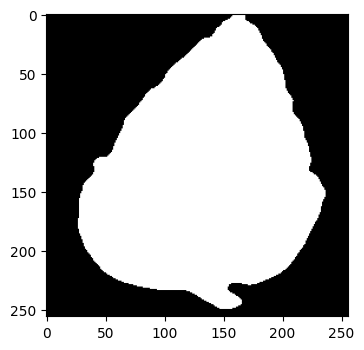

In [26]:
blur_8 = pcv.median_blur(dilated, 8)

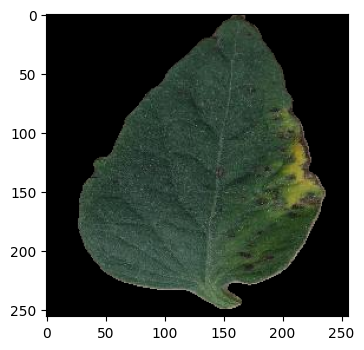

In [27]:
masked1= pcv.apply_mask(img=img, mask=blur_8, mask_color="black")